In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [2]:
user_data = './dcai_gcb_01/dcai_gcb_01'
test_data = './label_book/label_book'
df = pd.read_csv('./predictions_dcai_gcb_01.csv')
df['correct'] = df['truth'] == df['prediction']

In [3]:
df

,fp,dataset,truth,prediction,correct
0,dcai_gcb_01/dcai_gcb_01/val/i/b170ba82-ce5d-11...,val,1.0,1,True
1,dcai_gcb_01/dcai_gcb_01/val/i/b1715456-ce5d-11...,val,1.0,1,True
2,dcai_gcb_01/dcai_gcb_01/val/i/b171d700-ce5d-11...,val,1.0,1,True
3,dcai_gcb_01/dcai_gcb_01/val/i/b1725dec-ce5d-11...,val,1.0,1,True
4,dcai_gcb_01/dcai_gcb_01/val/i/b17352ce-ce5d-11...,val,1.0,1,True
...,...,...,...,...,...
837,label_book/label_book/x/a97df060-ce5d-11eb-b31...,test,10.0,10,True
838,label_book/label_book/x/a9a4255a-ce5d-11eb-b31...,test,10.0,10,True
839,label_book/label_book/x/a9b14348-ce5d-11eb-b31...,test,10.0,10,True
840,label_book/label_book/x/a9d6228a-ce5d-11eb-b31...,test,10.0,10,True


In [4]:
val_mask = df['dataset'] == 'val'
test_mask = df['dataset'] == 'test'
df[val_mask].correct.sum() / val_mask.sum(), df[test_mask].correct.sum() / test_mask.sum()

(0.9012658227848102, 0.7307692307692307)

(0.0, 1.4)

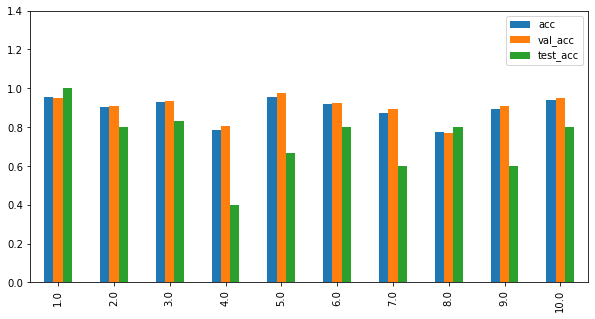

In [5]:
n_acc = pd.DataFrame()
for n, sub in df.groupby('truth'):
    val_mask = sub['dataset'] == 'val'
    test_mask = sub['dataset'] == 'test'
    n_acc.at[n, 'acc'] = sub['correct'].sum() / len(sub)
    n_acc.at[n, 'val_acc'] = sub.loc[val_mask, 'correct'].sum() / val_mask.sum()
    n_acc.at[n, 'test_acc'] = sub.loc[test_mask, 'correct'].sum() / test_mask.sum()
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
n_acc.plot.bar(ax=ax)
plt.ylim(0.0, 1.4)

In [6]:
valid = tf.keras.preprocessing.image_dataset_from_directory(
    user_data + '/val',
    labels="inferred",
    label_mode="categorical",
    class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
    shuffle=False,
    seed=123,
    batch_size=8,
    image_size=(32, 32),
)

test = tf.keras.preprocessing.image_dataset_from_directory(
    test_data,
    labels="inferred",
    label_mode="categorical",
    class_names=["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"],
    shuffle=False,
    seed=123,
    batch_size=8,
    image_size=(32, 32),
)

Found 790 files belonging to 10 classes.
Found 52 files belonging to 10 classes.


In [7]:
images = list(valid.unbatch()) + list(test.unbatch())
file_paths = valid.file_paths + test.file_paths

19

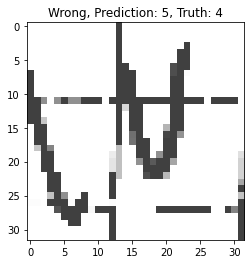

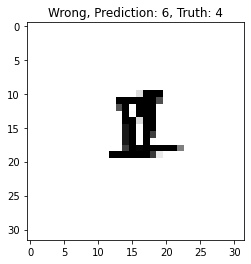

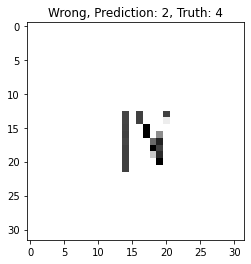

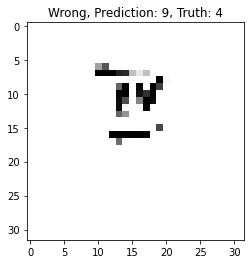

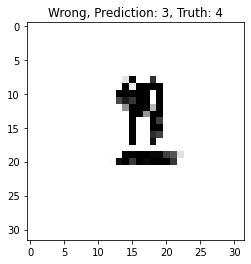

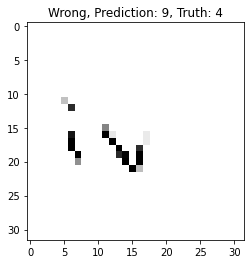

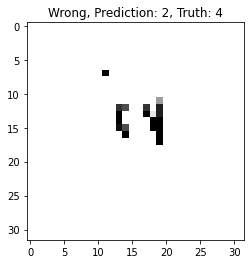

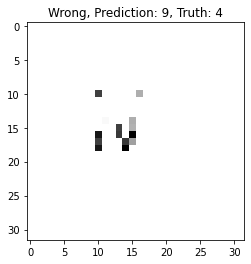

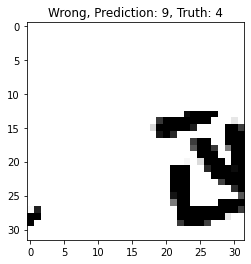

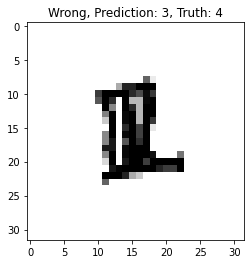

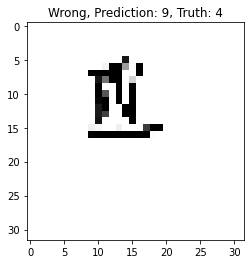

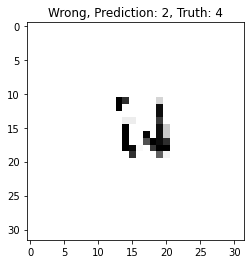

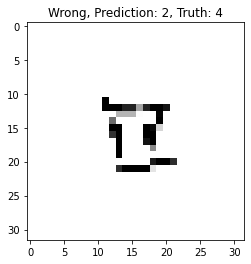

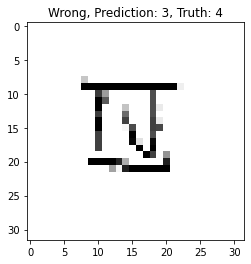

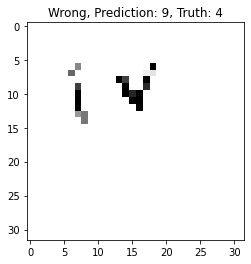

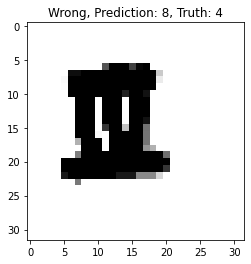

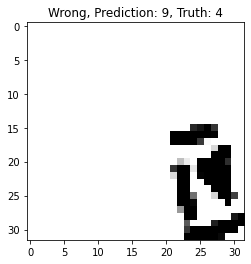

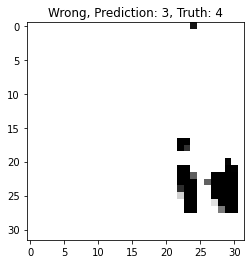

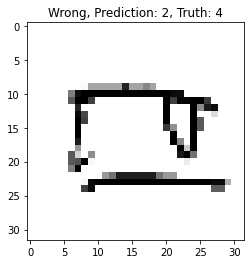

In [14]:
mask = (
    (df.correct == False)
#     & (df.dataset == 'test')
    & (df.truth == 4)
)
display(mask.sum())
for i, row in df[mask].sample(frac=1).iterrows():
    fp = './' + row['fp']
    truth = int(row['truth'])
    pred = int(row['prediction'])
    correct = 'Correct' if truth == pred else 'Wrong'
    fp_index = file_paths.index(fp)
    image = images[fp_index][0].numpy().astype(np.uint8)
    plt.imshow(image)
    plt.title('{}, Prediction: {}, Truth: {}'.format(correct, pred, truth))
    plt.show()
    plt.close()
